# CS319  Lab 6 : Q1

This notebook is based on `CS310-Week07.ipynb`, but with extraneous material removed.


## Analysing the Quadrature Data (from Week 7)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We copy some data computed by `00CheckConvergence.cpp`
* `N` is the set of numbers of intervals used in the calculations
* `T` is the set of values of `E_N` for the Trapezium Rule.

In [4]:
N = np.array([8, 16, 32, 64, 128, 256, 512, 1024])
T = np.array([3.07e-02, 7.784e-03, 1.83e-03, 4.06e-04, 2.01e-04, 3.5e-05, 7.89e-06, 1.144e-06]) # typical results

### A  `loglog` plot the data

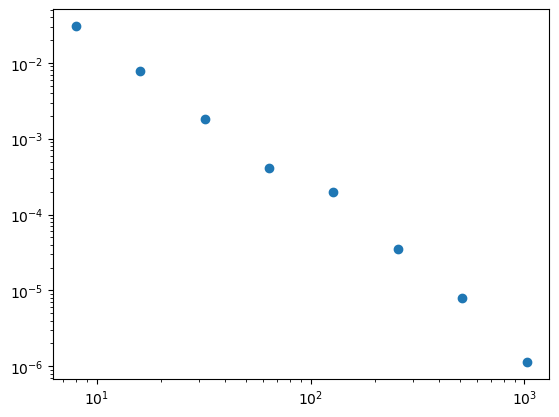

In [5]:
plt.loglog(N, T, 'o')
plt.show()

As discussed in class, $E_N \approx C N^{-q}$. Then, if we set
* `Y = log(T)`, 
* `X = log(N)`, and
* `K = log(C)`,
we get $Y \approx K - qT$. We have $Y$ and $T$, so we want to estimate $K$ and $q$, which are the slope and $Y$-intercept of the line. 

We'll use the (depreciated) `np.polyfit()` function to compute the coefficients of the line that best fits (in a least squares sense) the points $(X, Y)$. 

If we set `A=polyfit(x,y,n)` then `A` is a np.array with the coefficients of the polynomial of degree $n$ that best approximates the points $(x,y)$. That is 
$y \approx A[0] x^n + A[1] x^{n-1} + \dots + A[-1]$.

In [6]:
X = np.log(N)
Y = np.log(T)
Fit = np.polyfit( X, Y,1)
q = -Fit[0];
K = Fit[1];
print(f'We get K={K} and q={q}');

We get K=0.8320970379069774 and q=2.033972861054734


We can now recover the value of $C$

In [7]:
C = np.exp(K)
print(f'C={C : .3f} and q={q : .3f}');

C= 2.298 and q= 2.034


Let's plot to check:

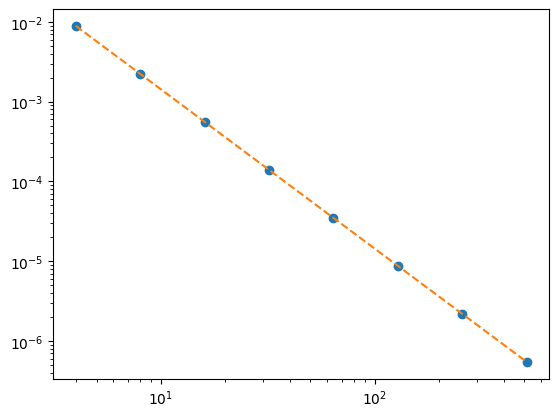

In [39]:
plt.loglog(N, T, 'o', N, C*N**(-q), '--')
plt.show()